In [1]:
from analysis import *
from utils import *
from pathlib import Path


params = [
    (1, 20),
    (2, 40),
    (3, 20),
    (4, 15),
    (5, 15),
    (6, 10)
]




# Slopes 

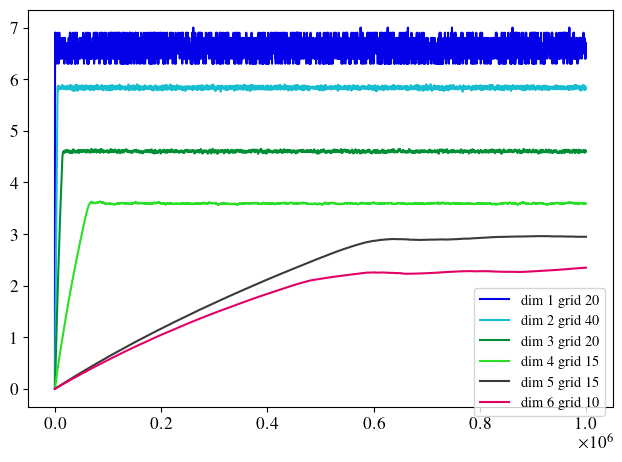

In [2]:
fig, ax = plt.subplots()

for dim, grid in params:
    path_dir = Path(f"data/d{dim}_g{grid}_c7_cl_nco/data_0.slopes.npy")
    step, slope = load_slope_values(path_dir.__str__())

    draw_slope(slope, step, ax=ax, label=f"dim {dim} grid {grid}")

fig.legend(fontsize="small", loc="lower right", bbox_to_anchor=(0.97, 0.1))


# Calculate the scaling exponents

## Visual assessment

In [3]:
from sandpile import generate_3d_distribution_from_data_sample
dim, grid = 2, 40
path_dir = Path(f"data/d{dim}_g{grid}_c7_cl_nco")
if not path_dir.joinpath("distribution.npz").exists():
    print("Generating distribution")
    generate_3d_distribution_from_data_sample(path_dir)
else:
    print("Distribution already exists")

(s, t, r), bins = load_3d_dist(path_dir)

Distribution already exists


/home/gabriel/Documents/Uni/Sandpiles/Code/analysis.py:66: RuntimeWarning: divide by zero encountered in power
  return np.exp(n.nominal_value) * x**m.nominal_value


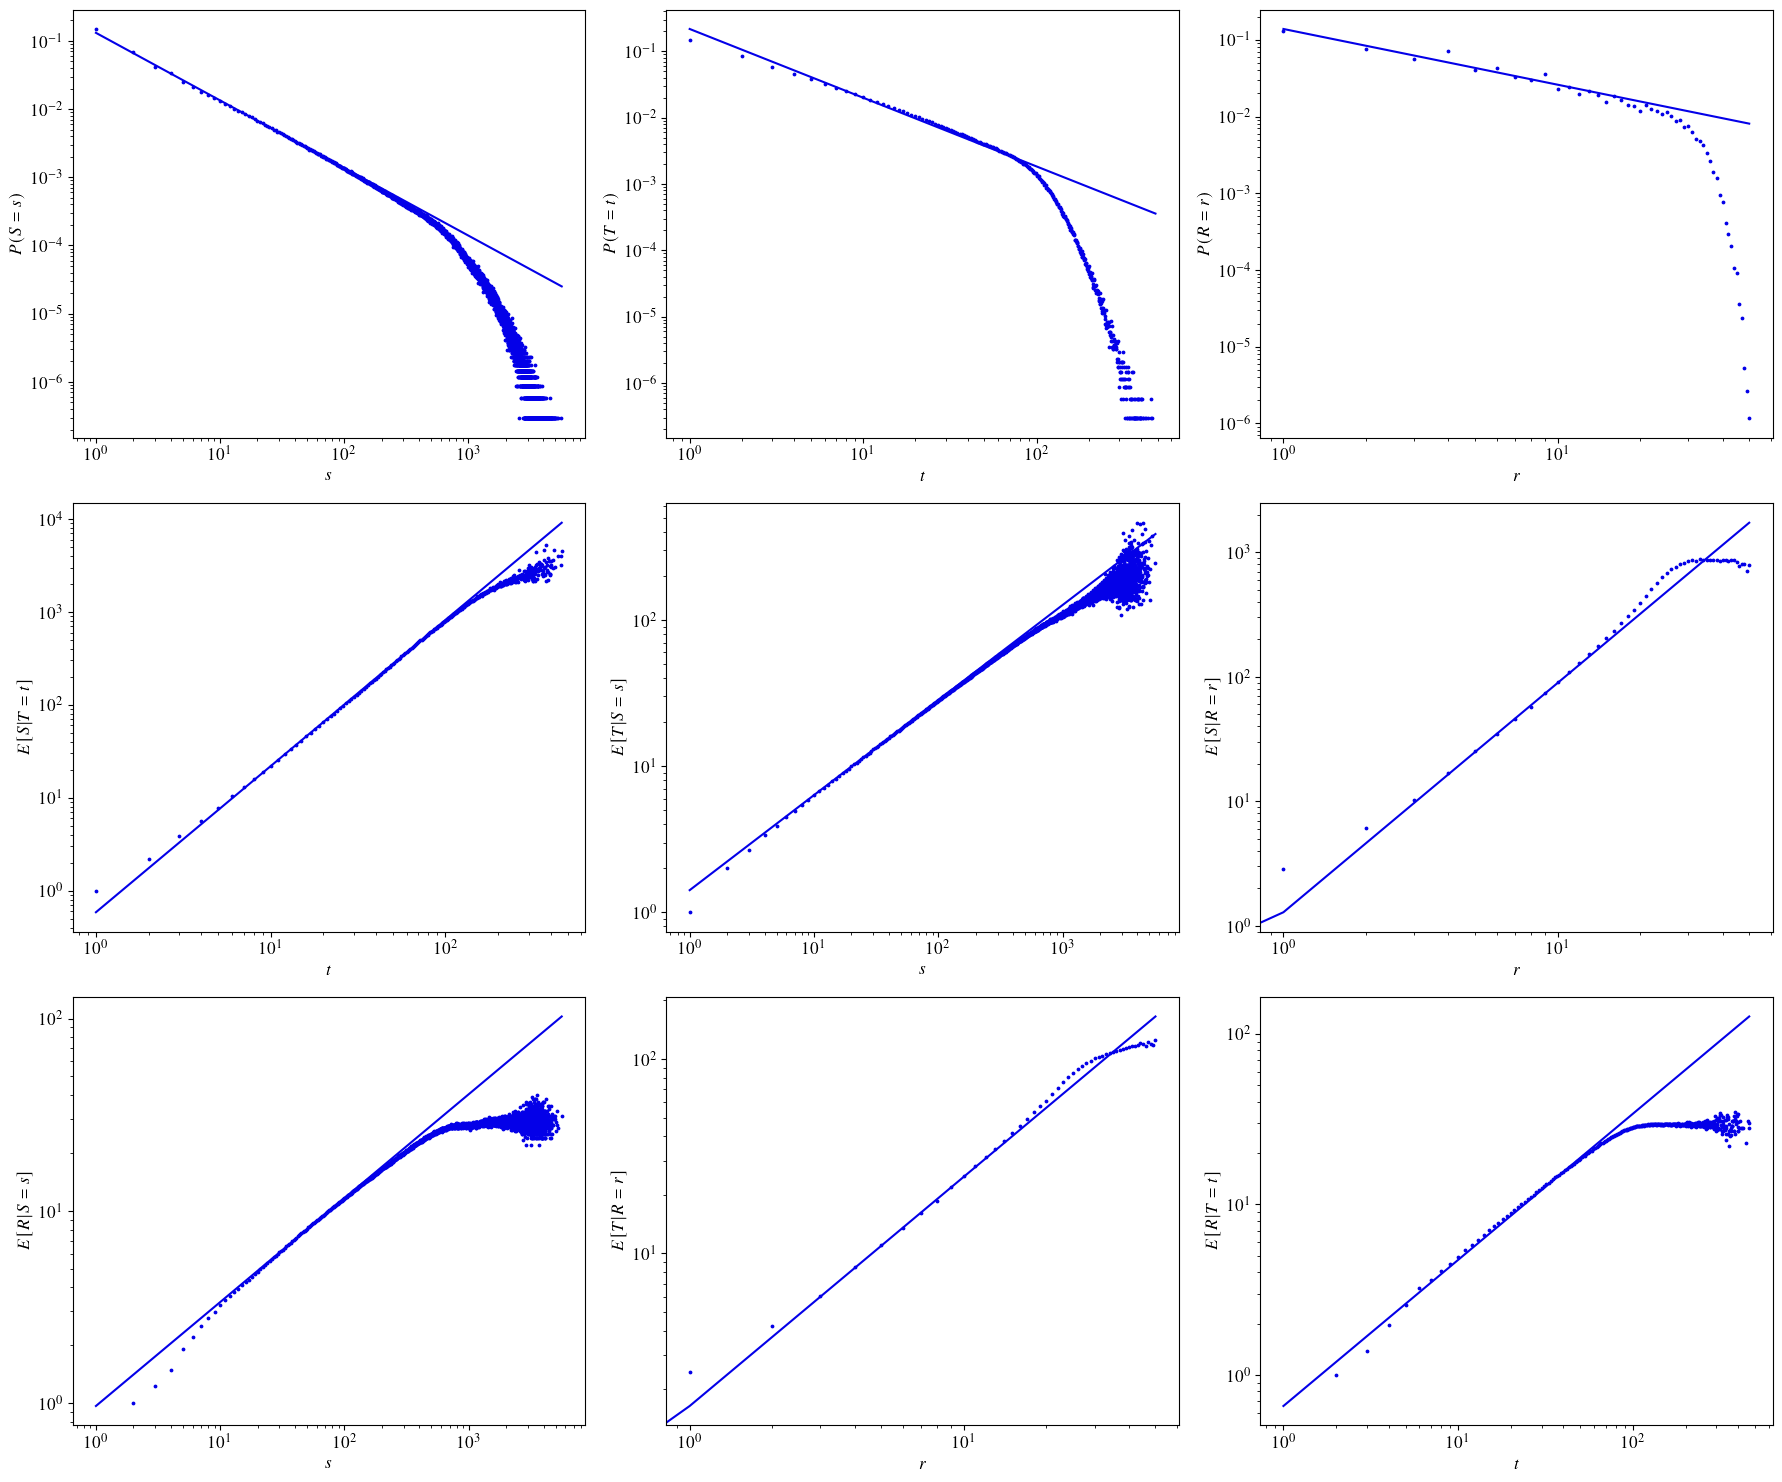

,tau,alpha,lambda,gamma1,1/gamma1,gamma2,1/gamma2,gamma3,1/gamma3
0,1.9910+/-0.0034,2.037+/-0.011,1.73+/-0.05,1.5731+/-0.0015,0.6503+/-0.0007,1.84+/-0.04,0.5404+/-0.0012,1.179+/-0.013,0.857+/-0.007


In [5]:
fig, axs = plt.subplots(3, 3, figsize=(18, 15))
limits = [
    (None, 70),
    (None, 100),
    (None, 15),
    (7, 100),
    (10, 80),
    (4, 11),
    (12, 140),
    (3, 12),
    (None, 70)
] 
exponents = plot_scaling_exponents(s, t, r, bins, axs, limits) # type: ignore
plt.tight_layout()
plt.show()
exponents

## Generating the table